- ENVISIONING THE ANSWER:
- Asking Question 
- Search for info 
- structure data 
- Envision the answer
- Represent the visualizaion
- Tell The story


- Introduction 
- Motivation  

- Question 
- Data Set Description 

- Data Processing ####
- Visualization/Description
- Quantitative Analysis (numbers)
- Qualitative Analysis (characters)

- Analysis

- Conclusion

# <span style="color:#ff4238;">__CP321 FINAL Project__</span>

#### Authors: Lucas Duncan, Owen Macgowan

#### Date: April 2024

![Friends](https://qph.cf2.quoracdn.net/main-qimg-55f2935b1d162eb07783e02013ca66e9-lq)

---
## <span style="color:#42a2d6;">__Summary of Contents__</span>
#### __Our Final project will cover the following topics:__
1. Introduction + Motivation
2. Research Question
3. Data Set Description + Importing
4. Data Processing
5. Analysis + Visualizations
6. Conclusions

# <span style="color:#f6be00;">__1. Introduction + Motivation__</span>

#### The frequency of dialogue, and frequency across genders, as well as the tone of that dialogue (specically exclamatory dialogue) plays an instrumental role in the plot, emotion, and story of a movie or tv show. These underpinning components of a good tv show, largely impact the perception of the story by the viewer, and subsequently rater, externalized through a rating.

#### As both avid enjoyers of the tv show FRIENDS, we were curious to see what impact the dialogue trends, (some of the most memorable plot in tv history) had on the rating of the episode to which they belonged.


# <span style="color:#06bef0;">__2. Research Question__</span>

### How do trends in speech, specifically exclamatory speech , and dialogue frequency affect episode rating in the series friends as a whole and across seasons/episodes, and what trends can we find in the gender breakdown of this speech?


# <span style="color:#f6beff;">__3. Data Set Importing + Description__</span>

#### The 2 datasets we will use for this project are 2 datasets about the FRIENDS tv show, both from the "rfordatascience" github account (source approved via email)

#### Within these datasets we define "Exclamatory Speech" as dialogue containing an exclamation mark or upper case letters, while by gender refers to breaking the dialogue of the 6 main characters into 2 groups by their gender


### Dialogue:  (Data Set 1/2)

#### A dataset representing each contigious line of dialogue within the show, it marks the exact dialogue used "text", the name of the character who said it, "speaker", the "season" and "episode" it occurs in, as well as the numbered "scene" within its episode it belongs to, and its index in that scene "utterance". 

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [194]:
dialogue = pd.read_csv(("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends.csv"))
dialogue.sample(2)

,text,speaker,season,episode,scene,utterance
36115,Phoebe...,Rachel Green,6,8,3,13
19135,"First of all, it's on your ass.",Dr. Rhodes,3,23,4,7


### Episode Info: (Dataset 2/2)

#### A dataset representing episode level information/statistics for every "season" and "episode". Within each row ("episode"), its episode "title", director name ("directed_by"), and writter ("written_by") are given, as well as its "air_date", the viewing numbers of that airing ("us_views_million"), and its rating by IMDB ("total_exclam_dialogue")

In [195]:
episodes = pd.read_csv(("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends_info.csv"))
episodes.sample(2)

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,18.6,8.5
15,1,16,The One with Two Parts: Part 1,Michael Lembeck,Marta Kauffman & David Crane,1995-02-23,26.1,8.2


# <span style="color:#00be00;">__4. Data Processing__</span>

#### This section focuses on formating and aggregating dialogue (speech) into episode level statistics specifically focusing on exclamatory speech within gendered categories.

In [196]:
#Filters Out Non Dialogue Rows
all_dialogue = dialogue[~dialogue["speaker"].isin(["Scene Directions", "#ALL#", "NA"])]

# 6 Main Character Names Divided By Gender
main_character_names_male = ["Ross Geller", "Chandler Bing", "Joey Tribbiani"]
main_character_names_female = ["Monica Geller", "Phoebe Buffay", "Rachel Green"]

In [197]:
#Number of rows with exclamatory text
def exclam_size(text):
    return (text.str.contains(r'[A-Z]{2,}') | text.str.contains(r'!')).sum()

#Groups data by episode
dialogue_stats_by_episode = all_dialogue.groupby(["season", "episode"]).apply(lambda x: pd.Series({
    
        "total_dialogue_male" : x.loc[x["speaker"].isin(main_character_names_male)]["text"].size,
        "total_dialogue_female" : x.loc[x["speaker"].isin(main_character_names_female)]["text"].size,

        "total_exclam_male" : exclam_size(x.loc[x["speaker"].isin(main_character_names_male)]["text"]),
        "total_exclam_female" : exclam_size(x.loc[x["speaker"].isin(main_character_names_female)]["text"])

})).reset_index().sort_values(by=["season", "episode"])
                                                                                                                                                                                                            
dialogue_stats_by_episode.head(2)

C:\Users\ldunc\AppData\Local\Temp\ipykernel_5724\3116006728.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dialogue_stats_by_episode = all_dialogue.groupby(["season", "episode"]).apply(lambda x: pd.Series({


,season,episode,total_dialogue_male,total_dialogue_female,total_exclam_male,total_exclam_female
0,1,1,125,140,27,40
1,1,2,92,80,13,22


In [198]:
#Merges with reviews
joined_table = pd.merge(dialogue_stats_by_episode, episodes, on=["season", "episode"]).drop(columns=["title", "directed_by", 
                                                                                                     "written_by", "air_date", "us_views_millions"])
joined_table.head(2)

,season,episode,total_dialogue_male,total_dialogue_female,total_exclam_male,total_exclam_female,imdb_rating
0,1,1,125,140,27,40,8.3
1,1,2,92,80,13,22,8.1


# <span style="color:#ff0000;">__5. Analysis + Visualizations__</span>

##### Before we incorporate rating, we wanted to first obtain a better understanding of empathic speech occurances, specifically between genders. Our first step was comparing the sheer quantity of exclamatory speech, between genders (See Graph Below and Corrasponding Observations)

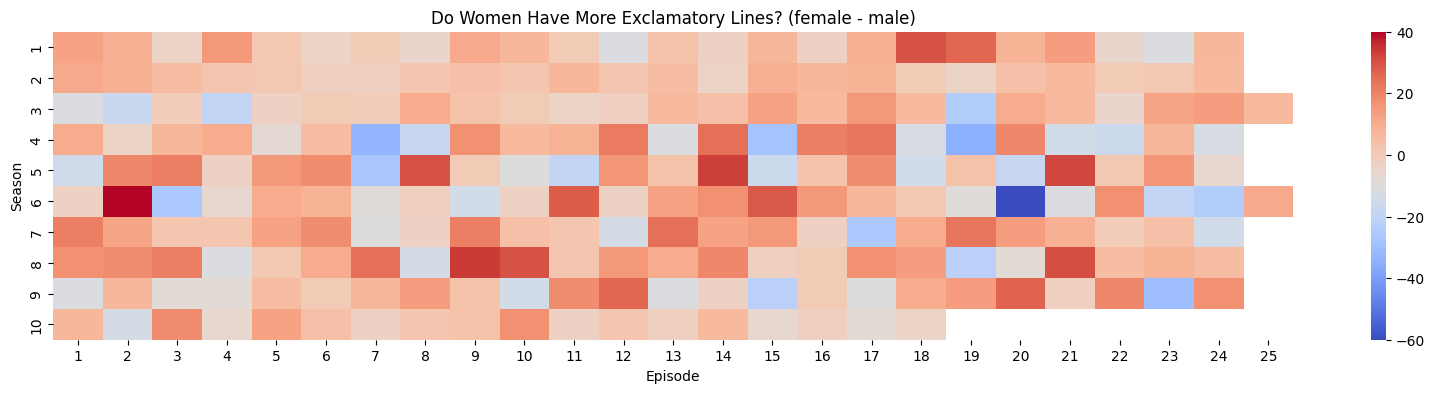

In [199]:
# Pivoting Prep
pivot_df = joined_table.pivot(index='season', columns='episode', values=['total_exclam_male', 'total_exclam_female', 'total_dialogue_male', 'total_dialogue_female'])
joined_table['total_exclam_dialogue'] = (joined_table['total_exclam_male'] + joined_table['total_exclam_female'])/(joined_table['total_dialogue_male'] + joined_table['total_dialogue_female'])

#Returns How Many More EXCLAMATORY lines the girls said compared to the guys
difference_in_exclamatory_utterance = pivot_df['total_exclam_female'] - pivot_df['total_exclam_male']

# Create a heatmap
plt.figure(figsize=(20, 4))
sns.heatmap(difference_in_exclamatory_utterance, cmap='coolwarm', annot=False)
plt.title('Do Women Have More Exclamatory Lines? (female - male)')
plt.xlabel('Episode')
plt.ylabel('Season')
plt.show()

##### Insight And Observations Graph 1:

##### Interpreting this graph, the first thing we couldnt help but notice, was the sheer number of red episodes (meaning more exclamatory lines from female characters). Upon further inspection this occurs mostly strongly in the first 2 seasons, and last season, while the middle seasons contain a much healthier proportion of blue (although still in the vast minority). We also observed that on a smaller level among the few blue episodes (majority male exclamatory dialogue), they tended to be grouped together (in 2/3 episode chunks). This trend also seemed to hold (with a couple exceptions) on the red episodes, in which case we observed episodes that were strongly red tends to appear adjacent to each other.

##### Our next goal was comparing frequency of exclamatory dialogue between genders; that is how do the ratio of exclamatory dialogue relative to total dialogue differ between gender (See Graph Below and Corrasponding Observations)

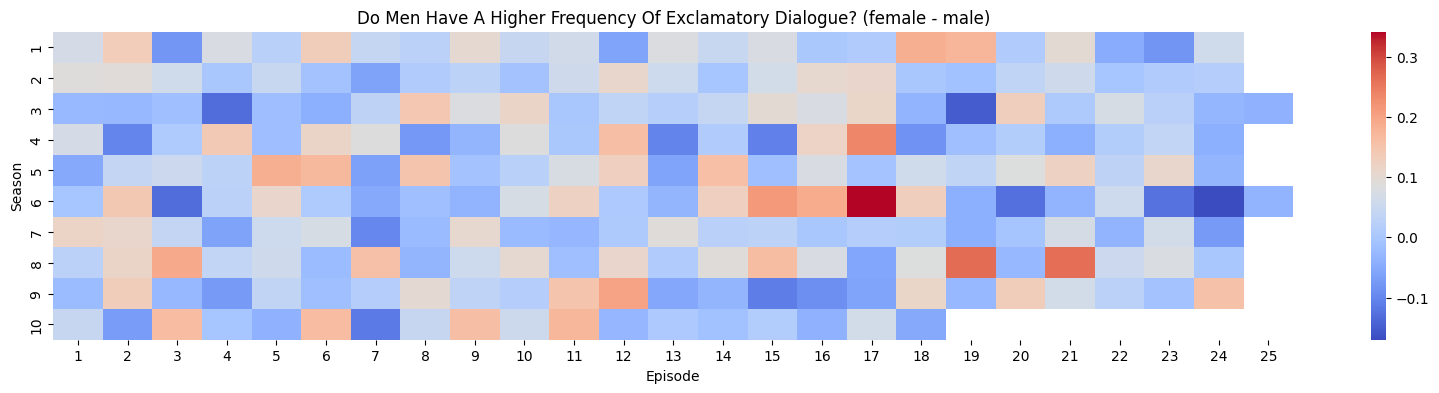

In [200]:
#Returns the difference in fraction of exclamatory speech vs dialogue between the girls and the guys
difference_in_fraction_of_exclamatory_utterance = pivot_df['total_exclam_female']/pivot_df['total_dialogue_female'] - pivot_df['total_exclam_male']/pivot_df['total_dialogue_male']

#Prints Heapmap
plt.figure(figsize=(20, 4))
sns.heatmap(difference_in_fraction_of_exclamatory_utterance, cmap='coolwarm', annot=False)
plt.title('Do Men Have A Higher Frequency Of Exclamatory Dialogue? (female - male)')
plt.xlabel('Episode')
plt.ylabel('Season')
plt.show()

##### Insight and Observations Graph 2:

In contrast to the previous graph, this one is dominated by blue (meaning male characters used exclamatory dialogue at a higher frequency of dialogue compared to female characters). We see this trend very strongly occuring within the last 2/3 episodes of most seasons. And interestingly asside from a longer stretch in the second half of season 6 (of length 5), nowhere else in the show do we see more then 2 red episodes in a row. This provides an interesting contrast to the previous graph; as the minority class tended to be more clustered together.

Now that we have a better understanding of some of the gender trends, we wanted to better understand whether a correlation exists between the frequency of this exclamatory dialogue per episode and the episodes rating, and we felt the best way to see larger trends was through a moving average line graph (See Graph Below and Corrasponding Observations)

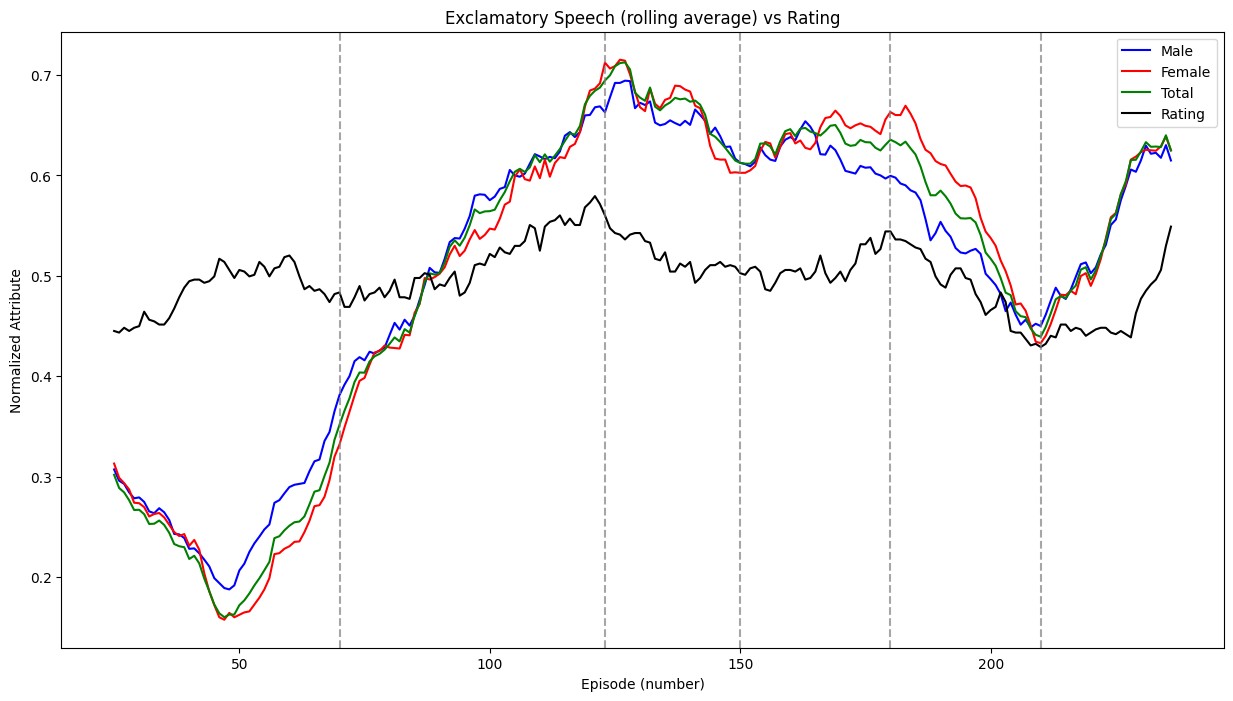

In [220]:
#Obtaining Columns
male = joined_table["total_exclam_male"]
female = joined_table["total_exclam_female"]
total = (male + female)/2
rating = joined_table["imdb_rating"]

#Normalizing Data Between (0-1)
male = (male - male.mean())/(male.max() - male.min()) + 0.5
female = (female - female.mean())/(female.max() - female.min()) + 0.5
total = (total - total.mean())/(total.max() - total.min()) + 0.5
rating = (rating - rating.mean() )/(rating.max() - rating.min()) + 0.5

#Finding the rolling average
window = 25
rolling_male = male.rolling(window=window).mean()
rolling_female = female.rolling(window=window).mean()
rolling_total = total.rolling(window=window).mean()
rolling_rating = rating.rolling(window=window).mean()

#Plotting
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(joined_table) + 1), rolling_male, label="Male", color='blue')
plt.plot(range(1, len(joined_table) + 1), rolling_female, label="Female", color='red')
plt.plot(range(1, len(joined_table) + 1), rolling_total, label="Total", color='green')
plt.plot(range(1, len(joined_table) + 1), rolling_rating, label="Rating", color='black')
plt.legend()
plt.xlabel("Episode (number)")
plt.ylabel("Normalized Attribute")
plt.title("Exclamatory Speech (rolling average) vs Rating")
for episode in [70,123,150, 180, 210]:
    plt.axvline(x=episode, color='gray', linestyle='--', alpha=0.7)

##### Insight and Observation Graph 3:
At rough first glance, these graph seem to be correlated, although its admittedly hard to tell given differences of normalized attribute magnitudes. 
We observe in section one (area to the left of the vertical bar at x = 70), that for the first 2-3 seasons, the rating appears to be an inverse to the exclamatory dialogue frequency. However after it in section 2, both trends appear to move upward, both peaking approximately at the second bar, after which both trend downwards in section 3, then both making a small increase in section 4, before both dropping violently in section 5, finished by a mutual recovery in section 6. So overall there seems to be a greater positive correlation then a negative one.

Curious by the relationship we had just seen: a positive relationship between rating and overall exclamatory speech, we also thought perhaps a relationship between episode location within a season had an impact on rating or exclamatory speech. (See Graph Below and Corrasponding Observations)

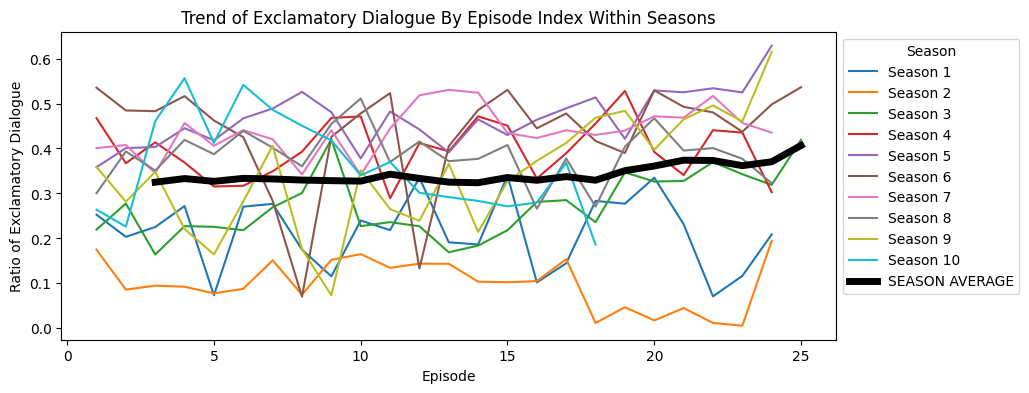

In [213]:

# Line plot for all seasons overlaid
plt.figure(figsize=(10, 4))

#Plotting Each Season
for season in joined_table['season'].unique():
    season_data = joined_table[joined_table['season'] == season].rolling(window=1).mean()
    sns.lineplot(x=range(1, len(season_data) + 1), y='total_exclam_dialogue', data=season_data, label=f'Season {season}')

#Plotting Average Line
episode_average = joined_table.groupby(["episode"])["total_exclam_dialogue"].agg("mean").reset_index(name='total_exclam_dialogue').rolling(window=3).mean()
episode_average
sns.lineplot(x=range(1, len(episode_average) + 1), y='total_exclam_dialogue', data=episode_average, label=f'SEASON AVERAGE',linewidth=5, color='black')


plt.xlabel('Episode')
plt.ylabel('Ratio of Exclamatory Dialogue')
plt.title('Trend of Exclamatory Dialogue By Episode Index Within Seasons')
plt.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


Insight and Observations Graph 4:

As we predicted, a definite correlation exists, exclamatory dialogue seems to increase in frequency over a season, culminating right at the end. We interpreted the reason for this as follows: seasons typically have resolutions or conflicts that are built up and reach their peak or conclusion around the end of a season, and these events are typically full of emotion driven speech. As a result, this is why most seasons have a trend of more exclamatory speech as the season reaches its conclusion.

This made us wonder if a similar trend occured in the ratings of episodes within a season (See Graph Below and Corrasponding Observations)

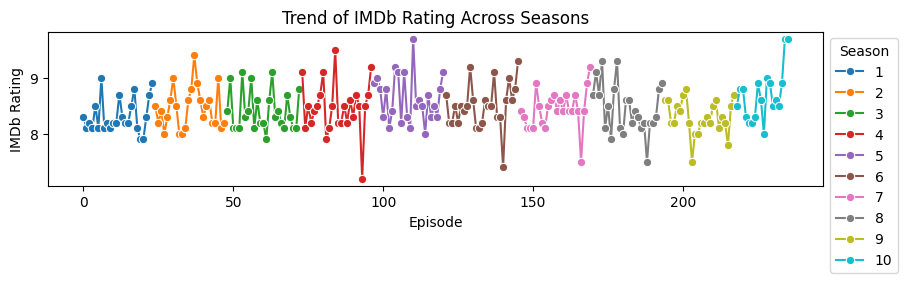

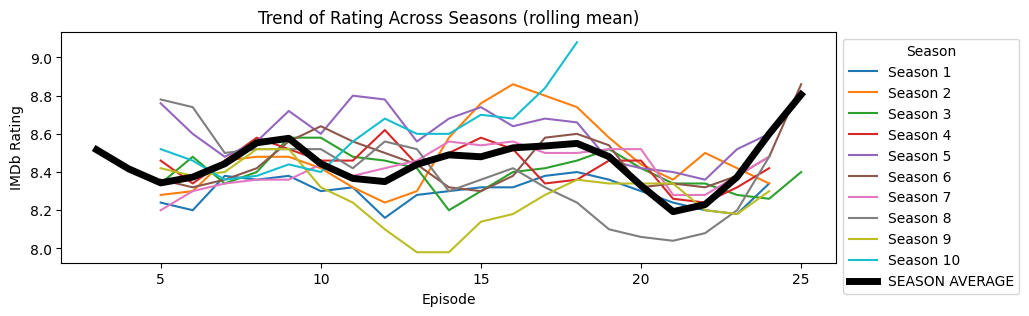

In [217]:

# Line plot for trend of IMDb rating across seasons

# Line plot for trend of IMDb rating across seasons
plt.figure(figsize=(10, 2))
sns.lineplot(x=joined_table.index, y='imdb_rating', hue='season', data=joined_table, marker='o',
             palette=sns.color_palette('tab10', n_colors=joined_table['season'].nunique()))
plt.xlabel('Episode')
plt.ylabel('IMDb Rating')
plt.title('Trend of IMDb Rating Across Seasons')
plt.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



# Line plot for all seasons overlaid
plt.figure(figsize=(10, 3))

# Plotting all seasons' IMDb rating on top of each other
for season in joined_table['season'].unique():
    season_data = joined_table[joined_table['season'] == season].rolling(window=5).mean()
    sns.lineplot(x=range(1, len(season_data) + 1), y='imdb_rating', data=season_data, label=f'Season {season}')

episode_average = joined_table.groupby(["episode"])["imdb_rating"].agg("mean").reset_index(name='imdb_rating').rolling(window=3).mean()
sns.lineplot(x=range(1, len(episode_average) + 1), y='imdb_rating', data=episode_average, label=f'SEASON AVERAGE',linewidth=5, color='black')

plt.xlabel('Episode')
plt.ylabel('IMDb Rating')
plt.title('Trend of Rating Across Seasons (rolling mean)')
plt.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Insight And Observation Graph 5/6:

Our first (5) was printed to just help highlight that rating across most seasons fluctuate greatly, with distinct bests and worsts, that dont necessarily tend to be fully grouped in long stretchs of consecutive episodes.

Our second graph (6) tells the story of season wide rating trends. Similar to graph 4, where we saw exclamatory speech peak towards the end of the season, we see a repeat of this trend, ratings increase and by a larger degree (which can probably be explaned using the same logic). However this graph also contains a few more interesting trends, it seems to move up then downwards 2 other times within the season, before dropping rapidly before the final few episodes. We felt this could be explained by setup (falling, then rising) and payoff (peak) of smaller arcs within each season, additionally the peak we see at the first episode might be attributed to last season leftover plot points, or the sparking of new interesting plot for the upcoming season.



# <span style="color:#06fee0;">__6. Conclusions__</span>

DATA SET: (data set description, search for info, structuring????????)

DATA PRE PROCESSING:

RESULTING VISUALIZATIONS: